In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
plt.style.use('plotting')

In [9]:
sample = np.loadtxt('M31analogs_halo_props_TNG100_revised.txt') 
print(sample[0], len(sample))

ids = sample[:,0]
halo_mass = sample[:,7]*1e10/0.704
stellar_mass = sample[:,8]*1e10/0.704
vmax = sample[:,9]

[ 4.29041000e+05  3.07635352e+03  3.25153672e+04  3.90027686e+03
 -1.47242756e+01 -3.30249146e+02  1.10245094e+02  1.02576187e+02
  3.81455040e+00  2.17312149e+02] 157


Text(0.5, 0, '$M_{vir}\\, \\, [M_{\\odot}]$')

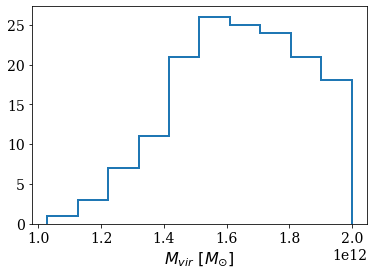

In [27]:
plt.figure()
plt.hist(halo_mass, bins = 10, histtype='step', lw=2)
plt.xlabel(r'$M_{vir}\, \, [M_{\odot}]$')

Text(0.5, 0, '$M_{*}\\, \\, [M_{\\odot}]$')

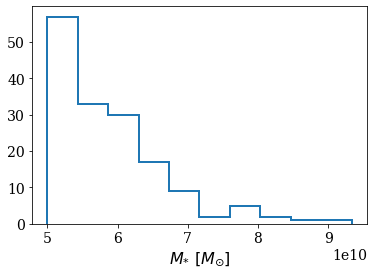

In [28]:
plt.figure()
plt.hist(stellar_mass, bins = 10, histtype='step', lw=2)
plt.xlabel(r'$M_{*}\, \, [M_{\odot}]$')

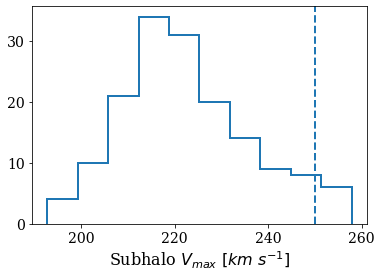

In [31]:
plt.figure()
plt.hist(vmax, bins = 10, histtype='step', lw=2)
plt.xlabel(r'Subhalo $V_{max}\,\, [km \, \, s^{-1}]$')
plt.axvline(x=250, ls='--')

In [32]:
mergers = np.loadtxt('M31analogs_merger_props_TNG100_revised.txt') 
last_maj = mergers[:,2]
num_maj = mergers[:,3]
num_min = mergers[:,4]

8.21393431111962


(-0.2, 14.0)

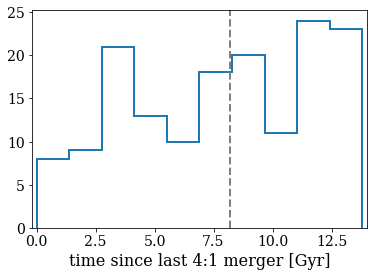

In [51]:
plt.figure()
plt.hist(last_maj, bins=10, histtype='step', lw=2)
plt.xlabel('time since last 4:1 merger [Gyr]')
print(np.median(last_maj))
plt.axvline(x=np.median(last_maj), ls='--', color='gray')
plt.xlim(-0.2,14.)

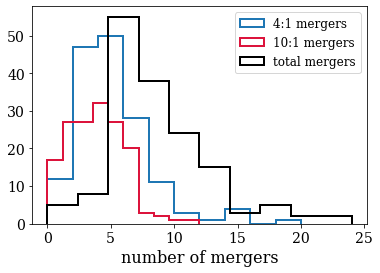

In [45]:
plt.figure()
plt.hist(num_maj, bins=10, histtype='step', lw=2, label='4:1 mergers')
plt.hist(num_min, bins=10, histtype='step', color='crimson', lw=2, label='10:1 mergers')
plt.hist(num_maj+num_min, bins=10, histtype='step', color='k', lw=2, label='total mergers')
plt.xlabel('number of mergers')
plt.legend(loc='upper right')


In [55]:
print(vmax[num_maj>10])
print(num_maj[vmax < 200])

[223.39108276 219.04237366 234.98887634 225.99510193 216.83578491
 216.07565308 221.92431641 222.85983276 231.59451294]
[8. 5. 4. 7. 5. 2.]
